# Data Analysis and Feature Engineering

This notebook implements a comprehensive data analysis and feature engineering for the challenge
.

## Table of Contents
1. [Setup and Data Loading](#Setup-and-Data-Loading)
2. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-EDA)
3. [Feature Engineering](#Feature-Engineering)
4. [Data Preparation for Modeling](#Data-Preparation-for-Modeling)

## Step 1: Setup and Data Loading

Import necessary libraries and load the challenge data.

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualization style
plt.style.use('default')
sns.set_palette('husl')

# Configure pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [4]:
# Load the CSV file into a pandas DataFrame
# The file uses semicolon as delimiter and may have quoted text containing semicolons
df = pd.read_csv('challenge_data-18-ago.csv', sep=';', quotechar='"', quoting=1)

print(f"Data loaded successfully! Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

Data loaded successfully! Shape: (3565, 3)
Columns: ['title', 'abstract', 'group']


## Step 2: Exploratory Data Analysis (EDA)

Perform initial data inspection to understand the dataset structure and characteristics.

In [5]:
# View the first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,title,abstract,group
0,"Adrenoleukodystrophy: survey of 303 cases: biochemistry, diagnosis, and therapy.","Adrenoleukodystrophy ( ALD ) is a genetically determined disorder associated with progressive central demyelination and adrenal cortical insufficiency . All affected persons show increased levels of saturated unbranched very-long-chain fatty acids , particularly hexacosanoate ( C26 0 ) , because of impaired capacity to degrade these acids . This degradation normally takes place in a subcellular organelle called the peroxisome , and ALD , together with Zellwegers cerebrohepatorenal syndrome , is now considered to belong to the newly formed category of peroxisomal disorders . Biochemical assays permit prenatal diagnosis , as well as identification of most heterozygotes . We have identified 303 patients with ALD in 217 kindreds . These patients show a wide phenotypic variation . Sixty percent of patients had childhood ALD and 17 % adrenomyeloneuropathy , both of which are X-linked , with the gene mapped to Xq28 . Neonatal ALD , a distinct entity with autosomal recessive inheritance and points of resemblance to Zellwegers syndrome , accounted for 7 % of the cases . Although excess C26 0 in the brain of patients with ALD is partially of dietary origin , dietary C26 0 restriction did not produce clear benefit . Bone marrow transplant lowered the plasma C26 0 level but failed to arrest neurological progression . .",neurological|hepatorenal
1,endoscopy reveals ventricular tachycardia secrets,"Research question: How does metformin affect cancer through pituitary adenoma mechanisms? Methods: randomized controlled study with 53 elderly patients, assessing encephalitis and aphasia. Results: significant improvement in primary endpoints. Implications: therapeutic innovation.",neurological
2,dementia and cholecystitis: organ interplay,"Purpose: This randomized controlled study examined statins for diabetes in adult population. The investigation included analysis of bun, cholelithiasis, and liver transplant. Methods: 461 participants were included. Results: decreased mortality rates. Implications: patient care improvement.",hepatorenal
3,The interpeduncular nucleus regulates nicotine's effects on free-field activity.,"Partial lesions were made with kainic acid in the interpeduncular nucleus of the ventral midbrain of the rat. Compared with sham-operated controls, lesions significantly (p < 0.25) blunted the early (<60 min) free-field locomotor hypoactivity caused by nicotine (0.5 mg kg(-1), i.m.), enhanced the later (60-120 min) nicotine-induced hyperactivity, and raised spontaneous nocturnal activity. Lesions reduced the extent of immunohistological staining for choline acetyltransferase in the interpeduncular nucleus (p <0.025), but not for tyrosine hydroxylase in the surrounding catecholaminergic A10 region. We conclude that the interpeduncular nucleus mediates nicotinic depression of locomotor activity and dampens nicotinic arousal mechanisms located elsewhere in the brain.",neurological
4,guillain-barre syndrome pathways in leukemia,"Hypothesis: statins improves stroke outcomes via migraine pathways. Methods: cross-sectional trial with 285 adult population, measuring astrocytoma and palsy. Results: improved patient outcomes. Conclusion: potential therapeutic benefits.",neurological


In [6]:
# Get DataFrame information
print("\nDataFrame Information:")
df.info()


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3565 entries, 0 to 3564
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     3565 non-null   object
 1   abstract  3565 non-null   object
 2   group     3565 non-null   object
dtypes: object(3)
memory usage: 83.7+ KB


In [7]:
# Get descriptive statistics
print("\nDescriptive Statistics:")
df.describe()


Descriptive Statistics:


,title,abstract,group
count,3565,3565,3565
unique,3563,3565,15
top,State-of-the-art thiazide diuretics for prostate cancer,"Adrenoleukodystrophy ( ALD ) is a genetically determined disorder associated with progressive central demyelination and adrenal cortical insufficiency . All affected persons show increased levels of saturated unbranched very-long-chain fatty acids , particularly hexacosanoate ( C26 0 ) , because of impaired capacity to degrade these acids . This degradation normally takes place in a subcellular organelle called the peroxisome , and ALD , together with Zellwegers cerebrohepatorenal syndrome , is now considered to belong to the newly formed category of peroxisomal disorders . Biochemical assays permit prenatal diagnosis , as well as identification of most heterozygotes . We have identified 303 patients with ALD in 217 kindreds . These patients show a wide phenotypic variation . Sixty percent of patients had childhood ALD and 17 % adrenomyeloneuropathy , both of which are X-linked , with the gene mapped to Xq28 . Neonatal ALD , a distinct entity with autosomal recessive inheritance and points of resemblance to Zellwegers syndrome , accounted for 7 % of the cases . Although excess C26 0 in the brain of patients with ALD is partially of dietary origin , dietary C26 0 restriction did not produce clear benefit . Bone marrow transplant lowered the plasma C26 0 level but failed to arrest neurological progression . .",neurological
freq,2,1,1058


In [8]:
# Check for missing values
print("\nMissing Values Count:")
missing_values = df.isnull().sum()
print(missing_values)

print(f"\nTotal missing values: {missing_values.sum()}")
print(f"Percentage of missing data: {(missing_values.sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")


Missing Values Count:
title       0
abstract    0
group       0
dtype: int64

Total missing values: 0
Percentage of missing data: 0.00%


### Data Visualization

Create various visualizations to understand data distributions and relationships.

In [9]:
# Identify and Examine the Target Variable
target_column = 'group'
print(f"\n🎯 Target Variable: '{target_column}'")

# Basic statistics about the target variable
print(f"\nTarget Variable Info:")
print(f"Data type: {df[target_column].dtype}")
print(f"Unique classes: {df[target_column].nunique()}")
print(f"Missing values: {df[target_column].isnull().sum()}")

# Display unique classes
unique_classes = df[target_column].unique()
print(f"\nUnique classes in target variable:")
for i, class_name in enumerate(unique_classes, 1):
    print(f"{i}. {class_name}")


🎯 Target Variable: 'group'

Target Variable Info:
Data type: object
Unique classes: 15
Missing values: 0

Unique classes in target variable:
1. neurological|hepatorenal
2. neurological
3. hepatorenal
4. cardiovascular
5. neurological|oncological
6. cardiovascular|hepatorenal
7. oncological
8. neurological|cardiovascular
9. cardiovascular|oncological
10. neurological|hepatorenal|oncological
11. neurological|cardiovascular|hepatorenal
12. hepatorenal|oncological
13. cardiovascular|hepatorenal|oncological
14. neurological|cardiovascular|hepatorenal|oncological
15. neurological|cardiovascular|oncological


In [10]:
# Target Variable Distribution Analysis
class_counts = df[target_column].value_counts()
class_percentages = df[target_column].value_counts(normalize=True) * 100

print(f"\n📈 Class Distribution:")
distribution_df = pd.DataFrame({
    'Class': class_counts.index,
    'Count': class_counts.values,
    'Percentage': class_percentages.values
})
print(distribution_df.round(2))

# Check for class imbalance
max_class_pct = class_percentages.max()
min_class_pct = class_percentages.min()
imbalance_ratio = max_class_pct / min_class_pct

print(f"\n⚖️ Class Imbalance Analysis:")
print(f"Most frequent class: {class_percentages.index[0]} ({max_class_pct:.1f}%)")
print(f"Least frequent class: {class_percentages.index[-1]} ({min_class_pct:.1f}%)")
print(f"Imbalance ratio: {imbalance_ratio:.2f}:1")

if imbalance_ratio > 3:
    print("⚠️ Significant class imbalance detected! Consider using techniques like:")
    print("   - Oversampling (SMOTE)")
    print("   - Undersampling")
    print("   - Class weights in model")
    print("   - Ensemble methods")
else:
    print("✅ Classes are relatively balanced")


📈 Class Distribution:
                                                  Class  Count  Percentage
0                                          neurological   1058       29.68
1                                        cardiovascular    645       18.09
2                                           hepatorenal    533       14.95
3                           neurological|cardiovascular    308        8.64
4                                           oncological    237        6.65
5                              neurological|hepatorenal    202        5.67
6                            cardiovascular|hepatorenal    190        5.33
7                              neurological|oncological    143        4.01
8                               hepatorenal|oncological     98        2.75
9                            cardiovascular|oncological     70        1.96
10              neurological|cardiovascular|hepatorenal     28        0.79
11                 neurological|hepatorenal|oncological     26        0.73
12

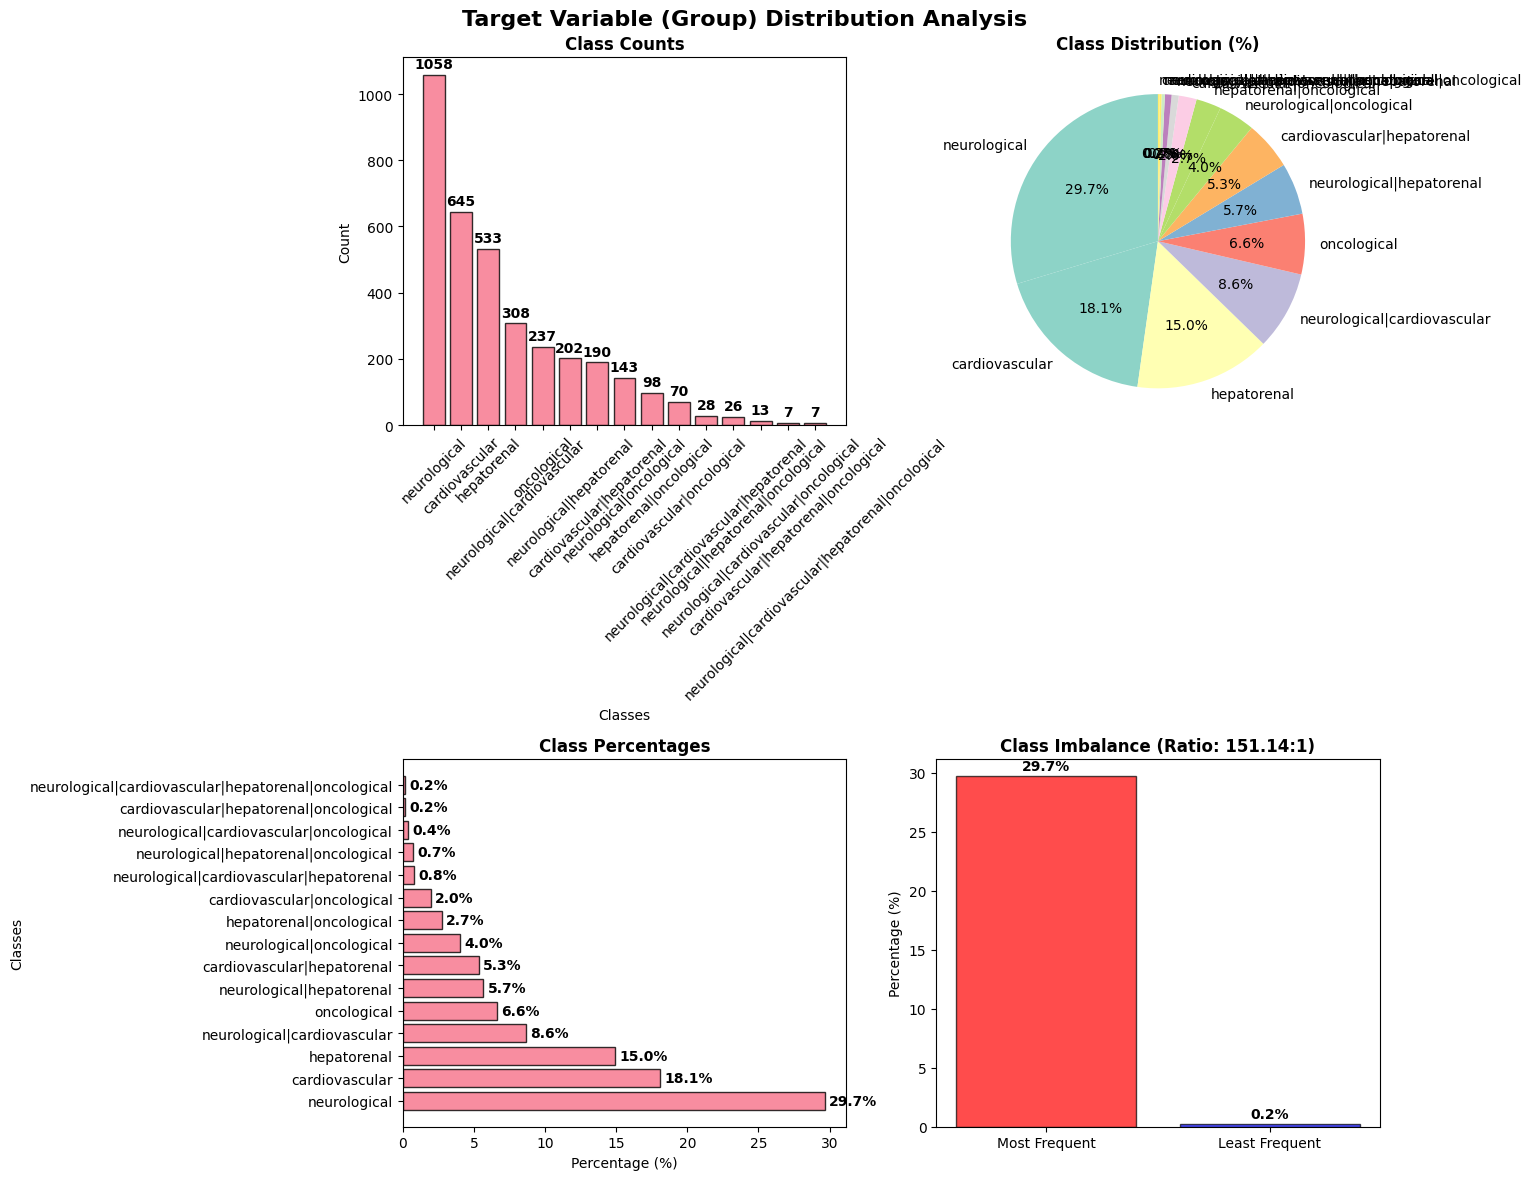

In [11]:
# Visualize Target Variable Distribution
# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Target Variable (Group) Distribution Analysis', fontsize=16, fontweight='bold')

# 1. Bar plot
axes[0, 0].bar(class_counts.index, class_counts.values, alpha=0.8, edgecolor='black')
axes[0, 0].set_title('Class Counts', fontweight='bold')
axes[0, 0].set_xlabel('Classes')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)

# Add count labels on bars
for i, v in enumerate(class_counts.values):
    axes[0, 0].text(i, v + max(class_counts.values) * 0.01, str(v), 
                   ha='center', va='bottom', fontweight='bold')

# 2. Pie chart
colors = plt.cm.Set3(np.linspace(0, 1, len(class_counts)))
wedges, texts, autotexts = axes[0, 1].pie(class_counts.values, labels=class_counts.index, 
                                         autopct='%1.1f%%', startangle=90, colors=colors)
axes[0, 1].set_title('Class Distribution (%)', fontweight='bold')

# 3. Horizontal bar plot with percentages
axes[1, 0].barh(class_counts.index, class_percentages.values, alpha=0.8, edgecolor='black')
axes[1, 0].set_title('Class Percentages', fontweight='bold')
axes[1, 0].set_xlabel('Percentage (%)')
axes[1, 0].set_ylabel('Classes')

# Add percentage labels
for i, v in enumerate(class_percentages.values):
    axes[1, 0].text(v + max(class_percentages.values) * 0.01, i, f'{v:.1f}%', 
                   va='center', fontweight='bold')

# 4. Class imbalance visualization
imbalance_data = [max_class_pct, min_class_pct]
imbalance_labels = ['Most Frequent', 'Least Frequent']
axes[1, 1].bar(imbalance_labels, imbalance_data, 
               color=['red', 'blue'], alpha=0.7, edgecolor='black')
axes[1, 1].set_title(f'Class Imbalance (Ratio: {imbalance_ratio:.2f}:1)', fontweight='bold')
axes[1, 1].set_ylabel('Percentage (%)')

# Add value labels
for i, v in enumerate(imbalance_data):
    axes[1, 1].text(i, v + max(imbalance_data) * 0.01, f'{v:.1f}%', 
                   ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


☁️ Generating WordClouds for each class...


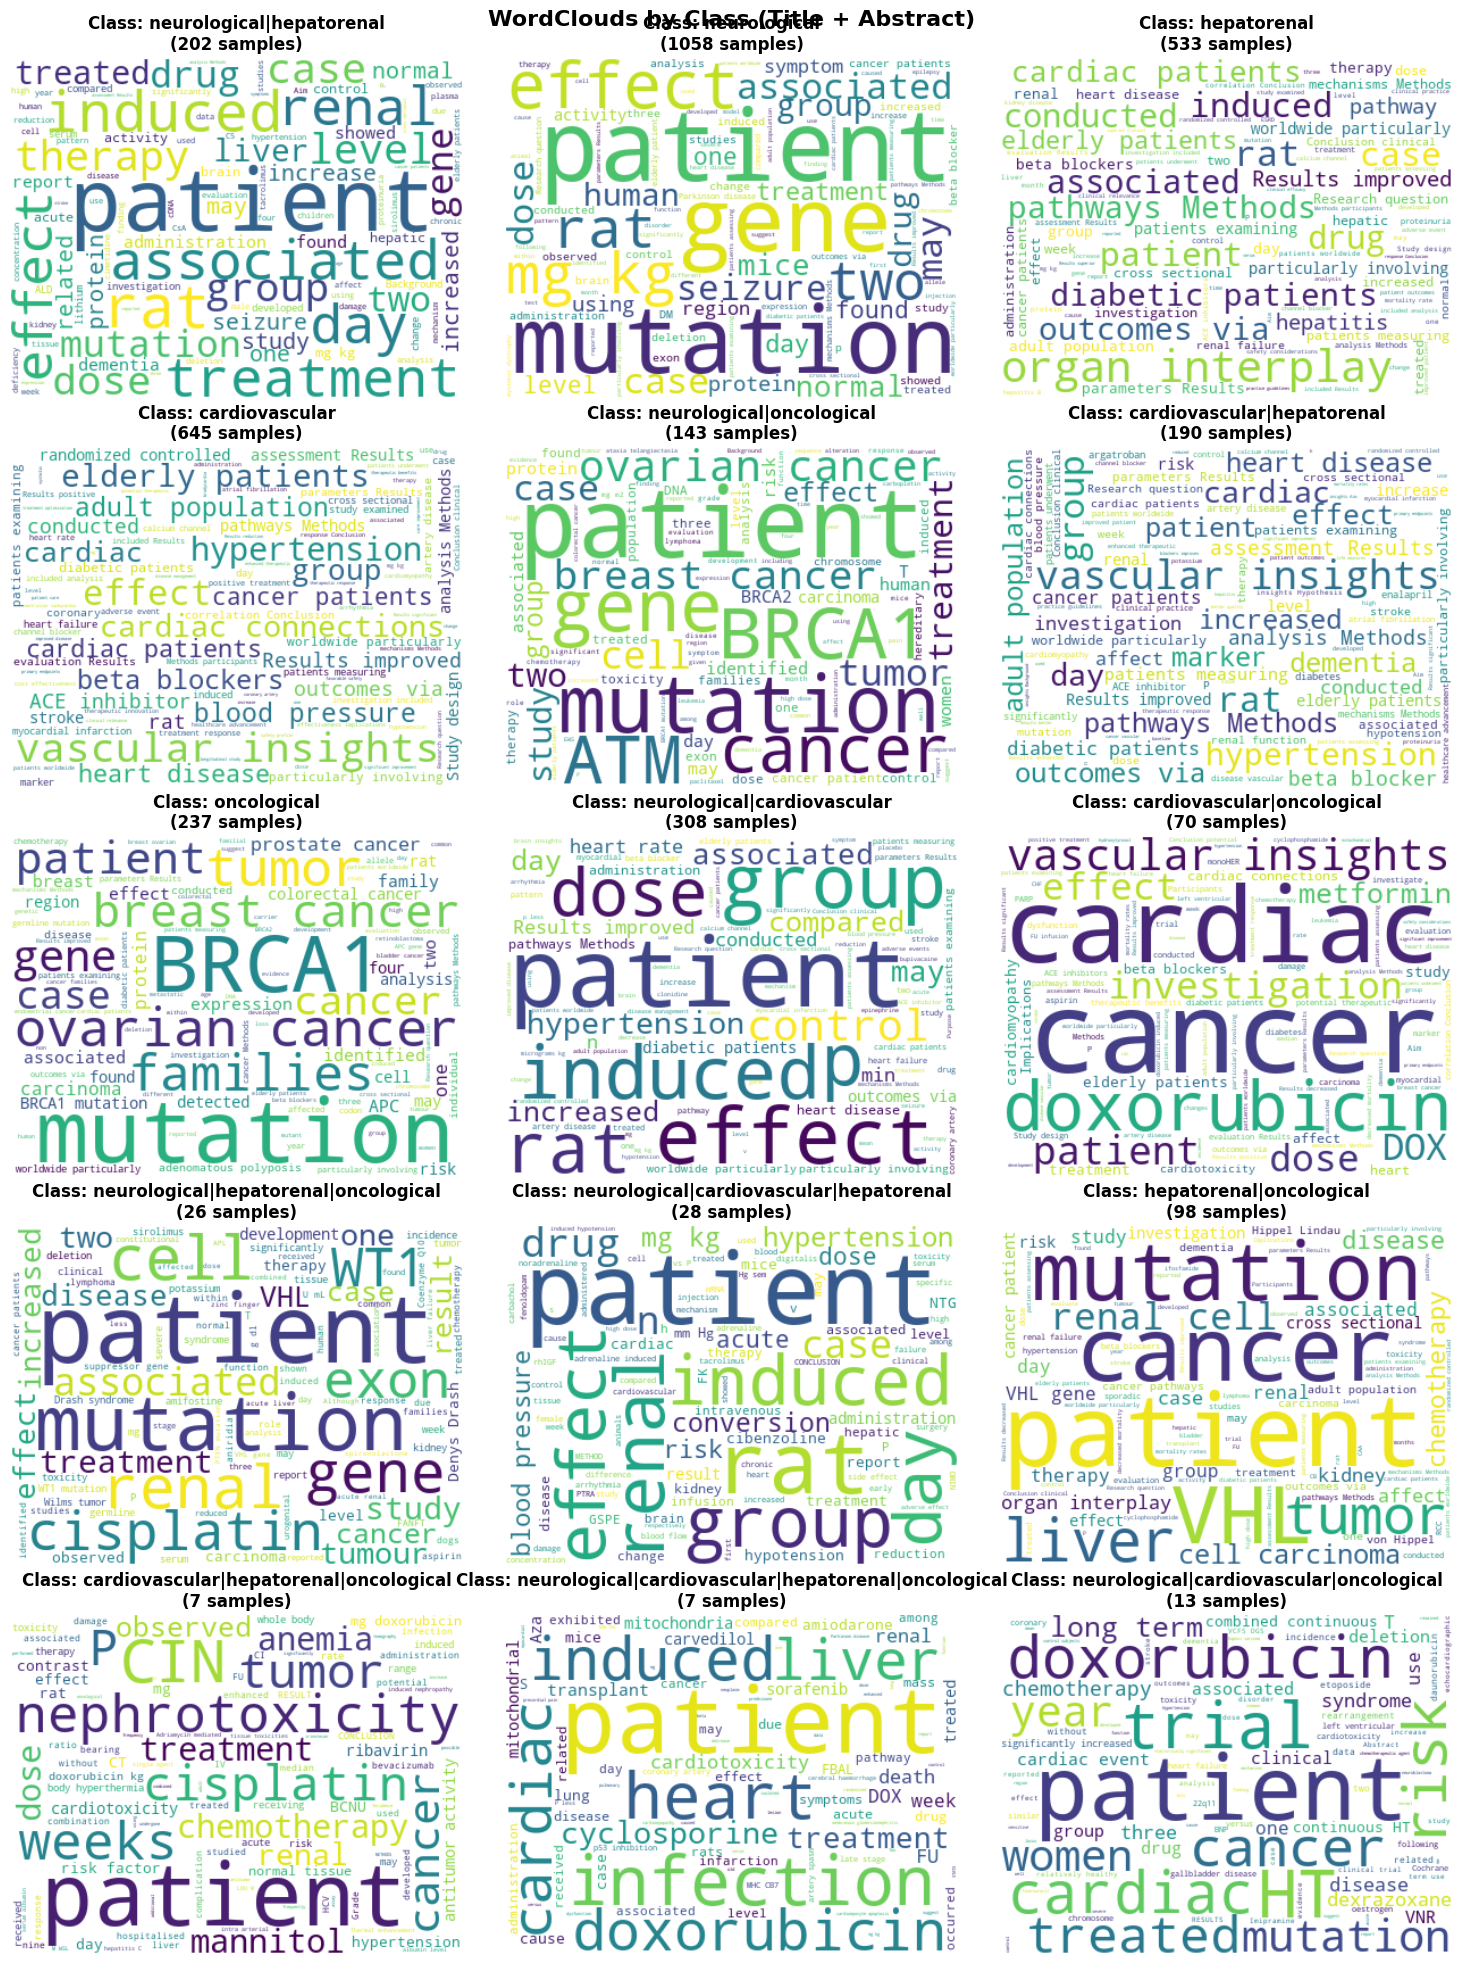

In [12]:
# WordCloud Analysis for Each Class
from wordcloud import WordCloud
from collections import Counter
print(f"\n☁️ Generating WordClouds for each class...")

# Combine title and abstract for text analysis
df['combined_text'] = df['title'].fillna('') + ' ' + df['abstract'].fillna('')

# Generate wordclouds for each class
n_classes = len(unique_classes)
cols = min(3, n_classes)  # Max 3 columns
rows = (n_classes + cols - 1) // cols  # Calculate required rows

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
fig.suptitle('WordClouds by Class (Title + Abstract)', fontsize=16, fontweight='bold')

# Handle single class case
if n_classes == 1:
    axes = [axes]
elif rows == 1:
    axes = axes if n_classes > 1 else [axes]
else:
    axes = axes.flatten()

for i, class_name in enumerate(unique_classes):
    # Get text for this class
    class_text = ' '.join(df[df[target_column] == class_name]['combined_text'].dropna())
    
    if len(class_text.strip()) > 0:
        # Create wordcloud
        wordcloud = WordCloud(width=400, height=300, 
                             background_color='white',
                             max_words=100,
                             colormap='viridis',
                             relative_scaling=0.5).generate(class_text)
        
        # Plot
        if n_classes == 1:
            ax = axes[0]
        else:
            ax = axes[i]
            
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.set_title(f'Class: {class_name}\n({class_counts[class_name]} samples)', 
                    fontweight='bold')
        ax.axis('off')
    else:
        print(f"⚠️ No text data available for class: {class_name}")

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [13]:
#Advanced Text Analysis per Class

print(f"\n📝 Advanced Text Analysis per Class:")

# Function to get top words for each class
def get_top_words(text, n_words=10):
    """Get top n words from text"""
    words = text.lower().split()
    # Remove common stop words (basic list)
    stop_words = {'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 
                  'of', 'with', 'by', 'from', 'up', 'about', 'into', 'through', 'during',
                  'before', 'after', 'above', 'below', 'between', 'among', 'is', 'are',
                  'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'do', 'does',
                  'did', 'will', 'would', 'should', 'could', 'can', 'may', 'might', 'must',
                  'this', 'that', 'these', 'those', 'we', 'us', 'our', 'ours', 'you', 'your',
                  'yours', 'he', 'him', 'his', 'she', 'her', 'hers', 'it', 'its', 'they',
                  'them', 'their', 'theirs'}
    
    filtered_words = [word for word in words if word not in stop_words and len(word) > 2]
    return Counter(filtered_words).most_common(n_words)

# Analyze each class
class_analysis = {}
for class_name in unique_classes:
    class_text = ' '.join(df[df[target_column] == class_name]['combined_text'].dropna())
    top_words = get_top_words(class_text, 15)
    
    class_analysis[class_name] = {
        'sample_count': class_counts[class_name],
        'percentage': class_percentages[class_name],
        'top_words': top_words,
        'total_words': len(class_text.split()),
        'unique_words': len(set(class_text.lower().split()))
    }

# Display analysis results
for class_name, analysis in class_analysis.items():
    print(f"\n{'='*60}")
    print(f"📊 Class: {class_name}")
    print(f"{'='*60}")
    print(f"Sample Count: {analysis['sample_count']}")
    print(f"Percentage: {analysis['percentage']:.2f}%")
    print(f"Total Words: {analysis['total_words']:,}")
    print(f"Unique Words: {analysis['unique_words']:,}")
    print(f"\nTop 15 Words:")
    for i, (word, count) in enumerate(analysis['top_words'], 1):
        print(f"{i:2d}. {word:<15} ({count:>4} times)")


📝 Advanced Text Analysis per Class:

📊 Class: neurological|hepatorenal
Sample Count: 202
Percentage: 5.67%
Total Words: 27,332
Unique Words: 5,848

Top 15 Words:
 1. patients        ( 199 times)
 2. results:        ( 107 times)
 3. renal           ( 104 times)
 4. methods:        (  87 times)
 5. study           (  81 times)
 6. disease         (  80 times)
 7. liver           (  78 times)
 8. conclusion:     (  73 times)
 9. clinical        (  70 times)
10. not             (  68 times)
11. patient         (  68 times)
12. treatment       (  61 times)
13. effects         (  60 times)
14. brain           (  53 times)
15. patients,       (  53 times)

📊 Class: neurological
Sample Count: 1058
Percentage: 29.68%
Total Words: 133,654
Unique Words: 15,178

Top 15 Words:
 1. patients        ( 813 times)
 2. results:        ( 542 times)
 3. study           ( 524 times)
 4. methods:        ( 460 times)
 5. disease         ( 431 times)
 6. gene            ( 423 times)
 7. not             ( 366 

In [14]:
# Target variable Analaysis Summary
print(f"\n{'='*80}")
print(f"📋 TARGET VARIABLE ANALYSIS SUMMARY")
print(f"{'='*80}")

print(f"✅ Target Variable: '{target_column}'")
print(f"✅ Number of Classes: {len(unique_classes)}")
print(f"✅ Total Samples: {len(df):,}")
print(f"✅ Missing Values: {df[target_column].isnull().sum()}")

print(f"\n🎯 Class Distribution:")
for class_name in class_counts.index:
    print(f"   • {class_name}: {class_counts[class_name]} samples ({class_percentages[class_name]:.1f}%)")

print(f"\n⚖️ Balance Assessment:")
if imbalance_ratio <= 2:
    print("   ✅ Well balanced dataset")
elif imbalance_ratio <= 3:
    print("   ⚠️ Slight imbalance - monitor performance")
else:
    print("   🚨 Significant imbalance - consider rebalancing techniques")

print(f"\n💡 Recommendations for Classification Task:")
print(f"   1. Use stratified train-test split to maintain class distribution")
if imbalance_ratio > 2:
    print(f"   2. Consider class balancing techniques (SMOTE, class weights)")
print(f"   3. Use appropriate evaluation metrics (F1-score, precision, recall)")
print(f"   4. Consider ensemble methods for robust predictions")
print(f"   5. Monitor per-class performance during model evaluation")

print(f"\n✨ Analysis Complete! Your target variable is ready for classification modeling.")


📋 TARGET VARIABLE ANALYSIS SUMMARY
✅ Target Variable: 'group'
✅ Number of Classes: 15
✅ Total Samples: 3,565
✅ Missing Values: 0

🎯 Class Distribution:
   • neurological: 1058 samples (29.7%)
   • cardiovascular: 645 samples (18.1%)
   • hepatorenal: 533 samples (15.0%)
   • neurological|cardiovascular: 308 samples (8.6%)
   • oncological: 237 samples (6.6%)
   • neurological|hepatorenal: 202 samples (5.7%)
   • cardiovascular|hepatorenal: 190 samples (5.3%)
   • neurological|oncological: 143 samples (4.0%)
   • hepatorenal|oncological: 98 samples (2.7%)
   • cardiovascular|oncological: 70 samples (2.0%)
   • neurological|cardiovascular|hepatorenal: 28 samples (0.8%)
   • neurological|hepatorenal|oncological: 26 samples (0.7%)
   • neurological|cardiovascular|oncological: 13 samples (0.4%)
   • cardiovascular|hepatorenal|oncological: 7 samples (0.2%)
   • neurological|cardiovascular|hepatorenal|oncological: 7 samples (0.2%)

⚖️ Balance Assessment:
   🚨 Significant imbalance - consider

## Step 3: Feature Engineering

Based on the EDA results, perform feature engineering operations.

In [15]:
# Create a copy of the dataframe for feature engineering
df_engineered = df.copy()

print("Starting feature engineering process...")
print(f"Original dataset shape: {df_engineered.shape}")

Starting feature engineering process...
Original dataset shape: (3565, 4)


In [16]:
# Handle Missing Values
print("\nHandling missing values...")

# Get columns with missing values
missing_cols = df_engineered.columns[df_engineered.isnull().any()]

if len(missing_cols) > 0:
    for col in missing_cols:
        missing_count = df_engineered[col].isnull().sum()
        missing_pct = (missing_count / len(df_engineered)) * 100
        
        print(f"\nColumn '{col}': {missing_count} missing values ({missing_pct:.2f}%)")
        
        if df_engineered[col].dtype in ['int64', 'float64']:
            # Numerical column - use median
            median_val = df_engineered[col].median()
            df_engineered[col].fillna(median_val, inplace=True)
            print(f"  -> Filled with median: {median_val}")
        else:
            # Categorical column - use mode
            mode_val = df_engineered[col].mode()[0]
            df_engineered[col].fillna(mode_val, inplace=True)
            print(f"  -> Filled with mode: {mode_val}")
else:
    print("No missing values found in the dataset.")

print(f"\nAfter handling missing values, shape: {df_engineered.shape}")


Handling missing values...
No missing values found in the dataset.

After handling missing values, shape: (3565, 4)


## Step 4: Data Preparation for Modeling

Prepare the engineered datasets for machine learning modeling.

In [19]:
df_engineered = pd.DataFrame(df_engineered)
df_engineered

,title,abstract,group,combined_text
0,"Adrenoleukodystrophy: survey of 303 cases: biochemistry, diagnosis, and therapy.","Adrenoleukodystrophy ( ALD ) is a genetically determined disorder associated with progressive central demyelination and adrenal cortical insufficiency . All affected persons show increased levels of saturated unbranched very-long-chain fatty acids , particularly hexacosanoate ( C26 0 ) , because of impaired capacity to degrade these acids . This degradation normally takes place in a subcellular organelle called the peroxisome , and ALD , together with Zellwegers cerebrohepatorenal syndrome , is now considered to belong to the newly formed category of peroxisomal disorders . Biochemical assays permit prenatal diagnosis , as well as identification of most heterozygotes . We have identified 303 patients with ALD in 217 kindreds . These patients show a wide phenotypic variation . Sixty percent of patients had childhood ALD and 17 % adrenomyeloneuropathy , both of which are X-linked , with the gene mapped to Xq28 . Neonatal ALD , a distinct entity with autosomal recessive inheritance and points of resemblance to Zellwegers syndrome , accounted for 7 % of the cases . Although excess C26 0 in the brain of patients with ALD is partially of dietary origin , dietary C26 0 restriction did not produce clear benefit . Bone marrow transplant lowered the plasma C26 0 level but failed to arrest neurological progression . .",neurological|hepatorenal,"Adrenoleukodystrophy: survey of 303 cases: biochemistry, diagnosis, and therapy. Adrenoleukodystrophy ( ALD ) is a genetically determined disorder associated with progressive central demyelination and adrenal cortical insufficiency . All affected persons show increased levels of saturated unbranched very-long-chain fatty acids , particularly hexacosanoate ( C26 0 ) , because of impaired capacity to degrade these acids . This degradation normally takes place in a subcellular organelle called the peroxisome , and ALD , together with Zellwegers cerebrohepatorenal syndrome , is now considered to belong to the newly formed category of peroxisomal disorders . Biochemical assays permit prenatal diagnosis , as well as identification of most heterozygotes . We have identified 303 patients with ALD in 217 kindreds . These patients show a wide phenotypic variation . Sixty percent of patients had childhood ALD and 17 % adrenomyeloneuropathy , both of which are X-linked , with the gene mapped to Xq28 . Neonatal ALD , a distinct entity with autosomal recessive inheritance and points of resemblance to Zellwegers syndrome , accounted for 7 % of the cases . Although excess C26 0 in the brain of patients with ALD is partially of dietary origin , dietary C26 0 restriction did not produce clear benefit . Bone marrow transplant lowered the plasma C26 0 level but failed to arrest neurological progression . ."
1,endoscopy reveals ventricular tachycardia secrets,"Research question: How does metformin affect cancer through pituitary adenoma mechanisms? Methods: randomized controlled study with 53 elderly patients, assessing encephalitis and aphasia. Results: significant improvement in primary endpoints. Implications: therapeutic innovation.",neurological,"endoscopy reveals ventricular tachycardia secrets Research question: How does metformin affect cancer through pituitary adenoma mechanisms? Methods: randomized controlled study with 53 elderly patients, assessing encephalitis and aphasia. Results: significant improvement in primary endpoints. Implications: therapeutic innovation."
2,dementia and cholecystitis: organ interplay,"Purpose: This randomized controlled study examined statins for diabetes in adult population. The investigation included analysis of bun, cholelithiasis, and liver transplant. Methods: 461 participants were included. Results: decreased mortality rates. Implications: patient care improvement.",hepatorenal,"dementia and cholecystitis: organ interplay Purpose: This randomized contro